# Machine Learning Sample Models
### Caleb Kolman

## Problem Framing & Big Picture

### Problem

*Many students may struggle in school due to a variety of factors, which can lead to poor grades, which may lead to reduced educational and career opportunities.*

*Solution Overview:*

*I propose a machine learning-based solution that analyzes a range of factors, including academic performance, attendance records, and socio-economic indicators, to predict a student's future academic performance. By identifying students who are predicted to have lower grades, we can proactively enroll them in tutoring programs tailored to their specific needs.*

### Supervised / Unsupervised, Online / Offline Learning


*Supervised Learning: In supervised learning, we have the "answers" already, meaning we have historical data on students, including features (like study habits, attendance, etc.) and their final grades. The model learns from this data to predict future students' grades, using the patterns it identifies in the historical data.*

*Offline Learning: Meaning the model is trained on a collected set of data all at once, rather than continuously learning from new data as it comes in. Once the model is trained, it can make predictions on new student data without being connected to the source of the data or learning in real-time.*

### Specific machine learning task that you are working on (regression/classification)

*For this project, I'm working on a regression task within machine learning. Regression is used when to predict a continuous number, like a grade from 0 to 20. My goal is to forecast students' final grades based on various factors, which can help in early identification of those who may need extra support.*

*In contrast, classification is used when the outcome is a category, such as "pass" or "fail".*

*I chose regression because my goal is to predict the specific final grade a student might achieve, which is a continuous value rather than a distinct class. Understanding the precise grade prediction can give us nuanced insights into how close a student might be to a performance threshold and allow for more tailored interventions.*

### Metrics to Measure Performance

*Mean Absolute Error (MAE): provides a prediction of accuracy. A lower MAE indicating better model performance.*

*Mean Squared Error (MSE): MSE calculates the average of the squares of the errors between predicted and actual values. A lower MSE value indicates better performance.*

*Root Mean Squared Error (RMSE): RMSE is the square root of MSE, making it more interpretable. A lower RMSE value signifies better model accuracy.*

### Non-Technical Explanation

*Imagine you have to get up early tomorrow morning, if you look at all of your habits today you may be able to predict if you will be tired or not when you wake up. For example, if you stayed up late, ate a bunch of junk food, and didn't drink a lot of water these might be indicators that you will be tired when you wake up tomorrow. We're applying a similar idea, using 'machine learning', to understand patterns in how students perform. This way, we can foresee who might have some 'bad habits' and we can provide external help before they begin to fail.*

---------------------
## Imports

In [1]:
# standard imports
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations

# For splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# For building and evaluating models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

# For data preprocessing and transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# For creating custom transformers
from sklearn.base import BaseEstimator, TransformerMixin

# For model evaluation
from sklearn.metrics import mean_absolute_error, accuracy_score, mean_squared_error


# Not sure if necessary for CodeGrade auto grading to function correctly but including it
pd.set_option('display.max_columns', 20)
np.set_printoptions(suppress=True)

### Import Data

In [2]:
# Bringing in student-mat csv file
students = pd.read_csv('student-mat.csv')

### Explore Data

In [3]:
# Check the shape of the DataFrame to understand its size
print("Data Size:", students.shape)  # This prints the number of rows and columns

# Check the data types of each column to understand the kind of data they hold
print("\nData Types:\n", students.dtypes)  # This prints the data type of each column

Data Size: (395, 35)

Data Types:
 school          object
sex             object
age            float64
address         object
famsize         object
Pstatus         object
Medu             int64
Fedu             int64
Mjob            object
Fjob            object
reason          object
guardian        object
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences_G1    float64
absences_G2    float64
absences_G3    float64
G1               int64
G2               int64
G3               int64
dtype: object


### Features and Descriptions

#### Attributes Description

1. **school**: Student's school ("GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2. **sex**: Student's sex ("F" - female or "M" - male)
3. **age**: Student's age (numeric from 15 to 22)
4. **address**: Student's home address type ("U" - urban or "R" - rural)
5. **famsize**: Family size ("LE3" - less or equal to 3 or "GT3" - greater than 3)
6. **Pstatus**: Parent's cohabitation status ("T" - living together or "A" - apart)
7. **Medu**: Mother's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8. **Fedu**: Father's education (0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9. **Mjob**: Mother's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10. **Fjob**: Father's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11. **reason**: Reason to choose this school (close to "home", school "reputation", "course" preference or "other")
12. **guardian**: Student's guardian ("mother", "father" or "other")
13. **traveltime**: Home to school travel time (1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime**: Weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures**: Number of past class failures (n if 1<=n<3, else 4)
16. **schoolsup**: Extra educational support (yes or no)
17. **famsup**: Family educational support (yes or no)
18. **paid**: Extra paid classes within the course subject (Math or Portuguese) (yes or no)
19. **activities**: Extra-curricular activities (yes or no)
20. **nursery**: Attended nursery school (yes or no)
21. **higher**: Wants to take higher education (yes or no)
22. **internet**: Internet access at home (yes or no)
23. **romantic**: With a romantic relationship (yes or no)
24. **famrel**: Quality of family relationships (from 1 - very bad to 5 - excellent)
25. **freetime**: Free time after school (from 1 - very low to 5 - very high)
26. **goout**: Going out with friends (from 1 - very low to 5 - very high)
27. **Dalc**: Workday alcohol consumption (from 1 - very low to 5 - very high)
28. **Walc**: Weekend alcohol consumption (from 1 - very low to 5 - very high)
29. **health**: Current health status (from 1 - very bad to 5 - very good)
30. **absences_G1**: Number of school absences for G1 term (numeric)
31. **absences_G2**: Number of school absences for G2 term (numeric)
32. **absences_G3**: Number of school absences for G3 term (numeric)
33. **G1**: First term grade (numeric: from 0 to 20)
34. **G2**: Second term grade (numeric: from 0 to 20)
35. **G3**: Final grade (numeric: from 0 to 20, this is your output target)

### Identify the target

#### 35. G3:  Final grade (numeric: from 0 to 20) is our target attribute. Meaning the Final Grade is the attribute we are trying to predict based on the other features given in the dataset. 

### Split data into a training and test set

In [4]:
# Features and target variable
X = students.drop('G3', axis=1)  # All columns except 'G3'
y = students['G3']  # Only the 'G3' column as the target

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This splits the dataset so that 80% is used for training and 20% for testing
# 'random_state' ensures reproducibility of our splits. Meaning we can always go back to that same random state.


----------------------
## Explore the Data Further

In [5]:
# Display the first few rows of the training set to understand its structure
print(X_train.head())

# Get a concise summary of the DataFrame, including the number of non-null values in each column
print(X_train.info())


    school sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
181     GP   M  16.0       U     GT3       T     3     3  services     other   
194     GP   M  16.0       U     GT3       T     2     3     other     other   
173     GP   F  16.0       U     GT3       T     1     3   at_home  services   
63      GP   F  16.0       U     GT3       T     4     3   teacher    health   
253     GP   M  16.0       R     GT3       T     2     1     other     other   

     ... freetime goout  Dalc  Walc  health absences_G1 absences_G2  \
181  ...        2     3     1     2       3         0.0         0.0   
194  ...        3     3     1     1       3         0.0         0.0   
173  ...        3     5     1     1       3         0.0         0.0   
63   ...        4     4     2     4       4         0.0         0.0   
253  ...        3     2     1     3       3         0.0         0.0   

    absences_G3  G1  G2  
181         2.0  12  13  
194         0.0  13  14  
173         0.

In [6]:
# Summary statistics for numeric columns
print(X_train.describe())

# Summary statistics for categorical columns
print(X_train.describe(include=['object']))


              age        Medu        Fedu  traveltime   studytime    failures  \
count  305.000000  316.000000  316.000000  316.000000  316.000000  316.000000   
mean    16.747541    2.734177    2.544304    1.430380    2.047468    0.335443   
std      1.274188    1.080375    1.078476    0.688842    0.836258    0.735588   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    3.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  316.000000  316.000000  316.000000  316.000000  316.000000  316.000000   
mean     3.943038    3.218354    3.161392    1.500000    2.344937    3.518987   
std      0.885464    1.0203

In [7]:
# Check for missing values
print(X_train.isnull().sum())

school          0
sex             0
age            11
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid            0
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences_G1    11
absences_G2    11
absences_G3    11
G1              0
G2              0
dtype: int64


In [8]:
# Frequency of categories in attributes
print(X_train['guardian'].value_counts())
print(X_train['studytime'].value_counts())
print(X_train['failures'].value_counts())
print(X_train['health'].value_counts())


guardian
mother    219
father     70
other      27
Name: count, dtype: int64
studytime
2    158
1     82
3     55
4     21
Name: count, dtype: int64
failures
0    247
1     45
3     13
2     11
Name: count, dtype: int64
health
5    116
3     75
4     49
1     41
2     35
Name: count, dtype: int64


### Visualizations

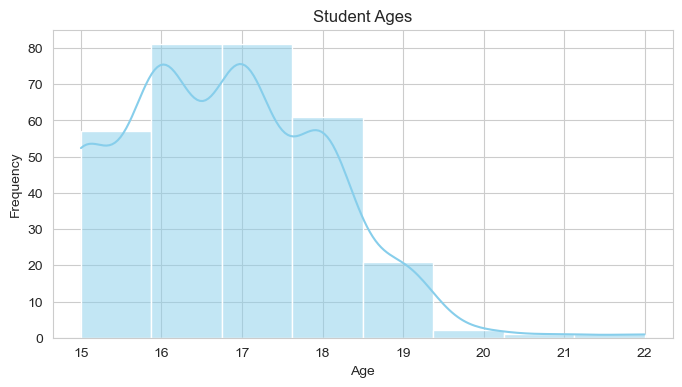

In [9]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# 1. Histogram for 'age'
plt.figure(figsize=(8, 4))
sns.histplot(X_train['age'], bins=8, kde=True, color='skyblue')
plt.title('Student Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# This plot helps us understand the age distribution of students, which may be important for some age-appropriate interventions.

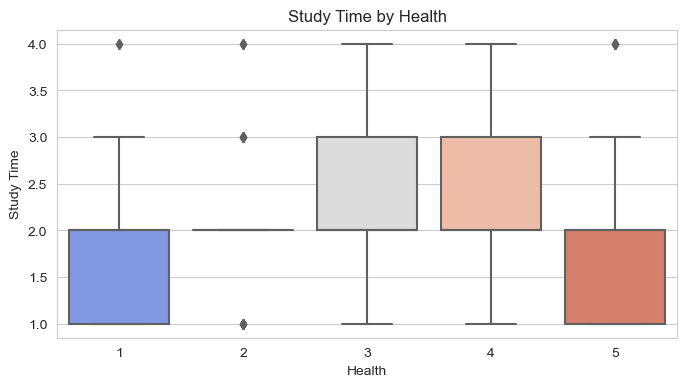

In [10]:
# 2. Boxplot for 'studytime'
plt.figure(figsize=(8, 4))
sns.boxplot(x='health', y='studytime', data=X_train, palette='coolwarm')
plt.title('Study Time by Health')
plt.xlabel('Health')
plt.ylabel('Study Time')
plt.show()
# The boxplot provides insights into the spread of study times across how healthy student where feeling.


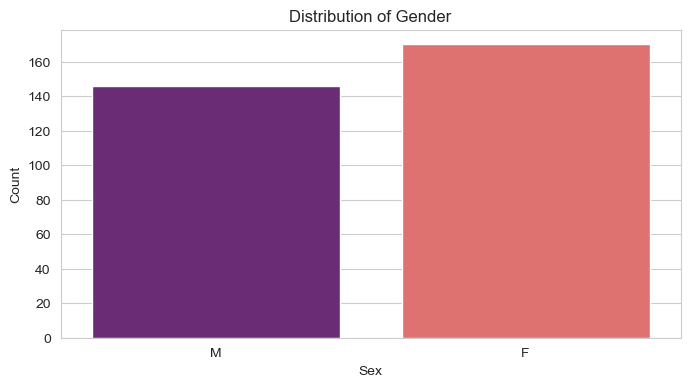

In [11]:
# 3. Bar Chart for 'sex'
plt.figure(figsize=(8, 4))
sns.countplot(x='sex', data=X_train, palette='magma')
plt.title('Distribution of Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()
# This bar chart shows the gender distribution, which is important for understanding the demographic makeup of the student population.

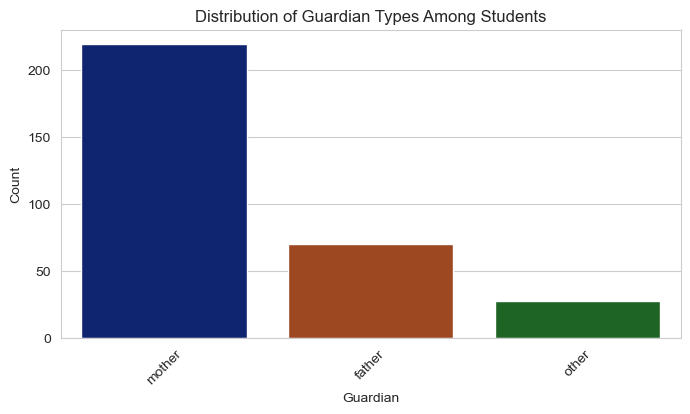

In [12]:
# 4. Bar Chart for Guardian Types for Students
plt.figure(figsize=(8, 4))
sns.countplot(x='guardian', data=X_train, palette='dark')
plt.title('Distribution of Guardian Types Among Students')
plt.xlabel('Guardian')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
# This chart shows the guardian of students. Father, mother, other which may be a good indicator of success in school.

### Look for correlations between attributes

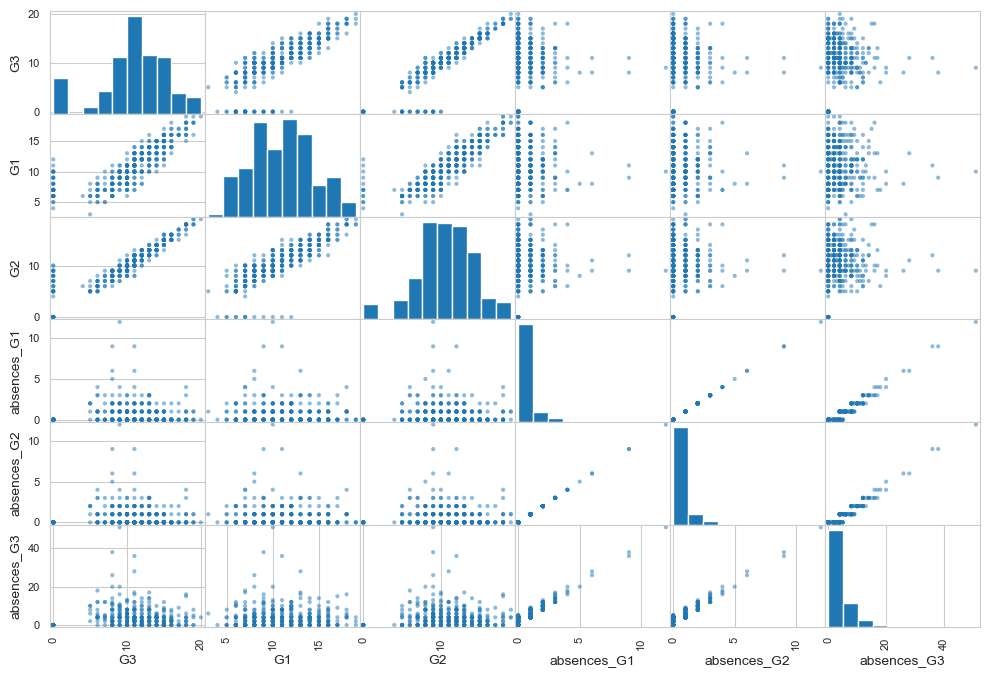

(G3             1.000000
 G2             0.904868
 G1             0.801468
 Medu           0.217147
 Fedu           0.152457
 studytime      0.097820
 absences_G3    0.067294
 famrel         0.051363
 absences_G1    0.012485
 absences_G2    0.012485
 freetime       0.011307
 Walc          -0.051939
 Dalc          -0.054660
 health        -0.061335
 traveltime    -0.117142
 goout         -0.132791
 age           -0.152762
 failures      -0.360415
 Name: G3, dtype: float64,
 None)

In [13]:
# Selecting a subset of numeric columns that are relevant for correlation analysis
numeric_columns = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
    'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', 'G3'
]

# Computing the correlation matrix for the numeric columns
corr_matrix = students[numeric_columns].corr()

# Looking at the correlations with the final grade 'G3' our target
correlations_with_target = corr_matrix["G3"].sort_values(ascending=False)

# Plotting scatter matrix for selected attributes including 'G3'
selected_attributes = ['G3', 'G1', 'G2', 'absences_G1', 'absences_G2', 'absences_G3']
scatter_matrix(students[selected_attributes], figsize=(12, 8))

# Show the correlation coefficients and the scatter matrix plot
correlations_with_target, plt.show()


#### Quick Correlation Analysis

#### Values close to 1 or -1 indicate a strong relationship. positive being both go up, negative being one goes up and the other comes down.

#### G2 (0.904868): This shows a very strong positive correlation with G3, meaning students' grades in the second term are strongly indicative of their final grades.
#### G1 (0.801468): Also a strong positive correlation, indicating that first-term grades are similarly indicative of final grades.
##### Medu (0.217147): A moderate positive correlation, suggesting that higher mother's education may be associated with better student performance.
#### Failures (-0.360415): A moderate negative correlation, indicating that students with more past class failures tend to have lower final grades.
#### Age (-0.152762): A slight negative correlation, suggesting that older students might perform slightly worse, although this relationship is not very strong.

---------------------
## Prepare the Data.

In [14]:
class_counts = y_train.value_counts()

# Identifying classes with fewer than 5 instances
small_classes = class_counts[class_counts < 5].index.tolist()

print("Classes with fewer than 5 instances:", small_classes)

Classes with fewer than 5 instances: [19, 5, 17, 20, 4]


In [15]:
# Filtering out instances belonging to under-represented classes
X_train = X_train[~y_train.isin(small_classes)]
y_train = y_train[~y_train.isin(small_classes)]

X_train.shape

(305, 34)

### Custom Transformer

In [16]:
# This custom transformer will select or drop features from the dataset
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        return X[self.feature_names]

# Features to keep
features_to_keep = ['G1', 'G2', 'Medu', 'Fedu', 'goout', 'age', 'failures', 'absences_G1', 'absences_G2', 'absences_G3']

# Initializing the transformer with the features to keep
feature_selector = FeatureSelector(feature_names=features_to_keep)

# Transforming the training data
X_train_selected = feature_selector.transform(X_train)

### Data pipeline to handle the data preparation steps

In [17]:
# Pipeline for academic indicators
academic_pipeline = Pipeline([
    ('selector', FeatureSelector(feature_names=['G1','G2', 'failures', 'absences_G1', 'absences_G2', 'absences_G3'])),
])

# Pipeline for socio-economic background features
socioeconomic_pipeline = Pipeline([
    ('selector', FeatureSelector(feature_names=['Medu', 'Fedu'])),
    # Ordinal encoder
    ('encoder', OrdinalEncoder(categories='auto'))
])

# Pipeline for lifestyle factors
lifestyle_pipeline = Pipeline([
    ('selector', FeatureSelector(feature_names=['goout', 'age'])),
])

# Combining all pipelines into a full pipeline
full_pipeline = ColumnTransformer([
    ('academic', academic_pipeline, ['G1', 'G2', 'failures', 'absences_G1', 'absences_G2', 'absences_G3']),
    ('socioeconomic', socioeconomic_pipeline, ['Medu', 'Fedu']),
    ('lifestyle', lifestyle_pipeline, ['goout', 'age']),
])

# Applying the full pipeline to the training data
X_train_prepared = full_pipeline.fit_transform(X_train)


### Fill in missing values or drop the rows or columns with missing values inside your pipeline

In [18]:
# Updating the numerical pipeline to include imputation
num_pipeline = Pipeline([
    ('selector', FeatureSelector(feature_names=['age', 'goout', 'failures', 'G1', 'G2', 'Medu', 'Fedu', 'absences_G1', 'absences_G2', 'absences_G3'])),
    ('imputer', SimpleImputer(strategy='median')),  
    ('std_scaler', StandardScaler()),
])

# Integrating the updated num_pipeline into the full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, ['age', 'goout', 'failures', 'G1', 'G2', 'Medu', 'Fedu', 'absences_G1', 'absences_G2', 'absences_G3']),
])

# Applying the full pipeline to the training data
X_train_prepared = full_pipeline.fit_transform(X_train)


In [19]:
# Sample DataFrame with missing values
num_features = ['G1', 'G2', 'Medu', 'Fedu', 'goout', 'age', 'failures', 'absences_G1', 'absences_G2', 'absences_G3']

sample_df = students[num_features].head(10)

# Apply FeatureSelector
selected_features_df = feature_selector.transform(sample_df)

# Apply SimpleImputer
imputed_df = SimpleImputer(strategy='median').fit_transform(selected_features_df)
imputed_df = pd.DataFrame(imputed_df, columns=selected_features_df.columns)
imputed_df

,G1,G2,Medu,Fedu,goout,age,failures,absences_G1,absences_G2,absences_G3
0,5.0,6.0,4.0,4.0,4.0,18.0,0.0,1.0,1.0,4.0
1,5.0,5.0,1.0,1.0,3.0,17.0,0.0,0.5,0.5,4.0
2,7.0,8.0,1.0,1.0,2.0,15.0,3.0,1.0,1.0,8.0
3,15.0,14.0,4.0,2.0,2.0,15.0,0.0,0.0,0.0,2.0
4,6.0,10.0,3.0,3.0,2.0,16.0,0.0,0.0,0.0,4.0
5,15.0,15.0,4.0,3.0,2.0,16.0,0.0,1.0,1.0,8.0
6,12.0,12.0,2.0,2.0,4.0,16.0,0.0,0.5,0.5,4.0
7,6.0,5.0,4.0,4.0,4.0,17.0,0.0,1.0,1.0,4.0
8,16.0,18.0,3.0,2.0,2.0,15.0,0.0,0.0,0.0,0.0
9,14.0,15.0,3.0,4.0,1.0,15.0,0.0,0.0,0.0,0.0


### Custom transformer in pipeline that: 
#### ● creates a new column in the data that sums the absences_G1, absences_G2, and absences_G3 data and then drops those three columns. 
#### ● has a parameter that when equal to True, drops the G1 and G2 columns, and when False, leaves the columns in the data

In [20]:
class AbsenceSummerAndColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, drop_G1_G2=False):
        # If True, G1 and G2 columns will be dropped from the dataset
        self.drop_G1_G2 = drop_G1_G2

    def fit(self, X, y=None):
        # No fitting necessary, so just return self
        return self

    def transform(self, X):
        # Ensuring we're working with a copy to avoid changing the original dataset
        X_transformed = X.copy()
        
        # Sum the absences and add as a new column
        X_transformed['total_absences'] = X_transformed['absences_G1'] + X_transformed['absences_G2'] + X_transformed['absences_G3']
        
        # Drop the original absence columns
        X_transformed.drop(['absences_G1', 'absences_G2', 'absences_G3'], axis=1, inplace=True)
        
        # Conditionally drop G1 and G2 if drop_G1_G2 is True
        if self.drop_G1_G2:
            X_transformed.drop(['G1', 'G2'], axis=1, inplace=True)
        
        return X_transformed


### Feature scaling on continuous numeric data in pipeline

In [21]:
# Defining the numerical features
num_features = ['G1', 'G2', 'Medu', 'Fedu', 'goout', 'age', 'failures', 'absences_G1', 'absences_G2', 'absences_G3']

num_pipeline = Pipeline([
    ('selector', FeatureSelector(feature_names=num_features)),  # Selecting the numeric features
    ('imputer', SimpleImputer(strategy='median')),  # Imputing missing values
    ('std_scaler', StandardScaler()),  # Scaling the features
])

# Integrating this into full pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
])


### Ordinal encode features and one-hot encode nominal / categorical data in a pipeline

In [23]:
# Lists of features
cat_ordinal_features = ['Medu', 'Fedu'] 

# Pipeline for ordinal features
ordinal_pipeline = Pipeline([
    ('selector', FeatureSelector(feature_names=cat_ordinal_features)),
    ('ordinal_encoder', OrdinalEncoder(categories='auto')) 
])


# Full pipeline integrating both nominal and ordinal feature pipelines
full_pipeline = ColumnTransformer([
    ('ordinal', ordinal_pipeline, cat_ordinal_features),
    ('selector', FeatureSelector(feature_names=num_features)),  # Selecting the numeric features
    ('imputer', SimpleImputer(strategy='median')),  # Imputing missing values
    ('std_scaler', StandardScaler()),  # Scaling the features
])

### Create a Column Transformer to transform numeric and categorical data

In [24]:
# Numerical features preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values
    ('std_scaler', StandardScaler()),  # Scale features
])

# Categorical features preprocessing for ordinal data
cat_ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values
    ('ordinal', OrdinalEncoder()),  # Ordinal encode
])

# Combine pipelines in a ColumnTransformer
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),  # Apply num_pipeline to num_features
    ('cat_ordinal', cat_ordinal_pipeline, cat_ordinal_features),  # Apply cat_ordinal_pipeline to cat_ordinal_features
])

# Applying the full pipeline
X_train_prepared = full_pipeline.fit_transform(X_train)


### Transform your training data using the above data preparation steps and pipelines. With two distinct sets of transformed training data: one containing the G1/G2 columns and another without the G1/G2 columns. 

### *Output the shape of two transformed training sets to show custom transformer correctly removed the two columns 

In [25]:
# Assuming AbsenceSummerAndColumnDropper and FeatureSelector are defined as before

# Initialize the transformer with features to keep, including 'G1' and 'G2'
feature_selector = FeatureSelector(feature_names=features_to_keep)

# Apply FeatureSelector to ensure the dataset includes the necessary columns before dropping
X_train_selected = feature_selector.transform(X_train)

# Initialize AbsenceSummerAndColumnDropper with drop_G1_G2=True
dropper_with_drop = AbsenceSummerAndColumnDropper(drop_G1_G2=True)

# Transform the training data to drop G1 and G2
X_train_with_drop = dropper_with_drop.transform(X_train_selected)

# Initialize AbsenceSummerAndColumnDropper with drop_G1_G2=False
dropper_without_drop = AbsenceSummerAndColumnDropper(drop_G1_G2=False)

# Transform the training data to keep G1 and G2
X_train_without_drop = dropper_without_drop.transform(X_train_selected)

# Output the shapes of the two transformed training sets
print("Shape with G1/G2 columns dropped:", X_train_with_drop.shape)
print("Shape without G1/G2 columns dropped:", X_train_without_drop.shape)


Shape with G1/G2 columns dropped: (305, 6)
Shape without G1/G2 columns dropped: (305, 8)


---------------------
## Shortlist Promising Models

### Fitting three promising models to data using transformed data

In [26]:
# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

# List of models for easy iteration
models = [log_reg, rf_clf, gb_clf]

# Fitting model
for model in models:
    # Fit the model
    model.fit(X_train_prepared, y_train)
    
    # Perform cross-validation to evaluate the model
    scores = cross_val_score(model, X_train_prepared, y_train, cv=5)
    
    # Output the mean and standard deviation of the cross-validation scores
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean CV Score: {scores.mean():.4f}, Std CV Score: {scores.std():.4f}\n")


Model: LogisticRegression
Mean CV Score: 0.3574, Std CV Score: 0.0420

Model: RandomForestClassifier
Mean CV Score: 0.4623, Std CV Score: 0.0599

Model: GradientBoostingClassifier
Mean CV Score: 0.4689, Std CV Score: 0.0833



### Compare all three models both with and without the G1/G2 columns with cross validation.

In [27]:
# Full pipeline with G1/G2 included (drop_G1_G2=False)
full_pipeline_with_G1_G2 = Pipeline([
    ('preprocessing', full_pipeline),  # Apply initial preprocessing (imputation, scaling, encoding)
    ('feature_modification', AbsenceSummerAndColumnDropper(drop_G1_G2=False))  # Keep G1 and G2
])

# Full pipeline with G1/G2 dropped (drop_G1_G2=True)
full_pipeline_without_G1_G2 = Pipeline([
    ('preprocessing', full_pipeline),  # Apply initial preprocessing
    ('feature_modification', AbsenceSummerAndColumnDropper(drop_G1_G2=True))  # Drop G1 and G2
])


In [28]:
def evaluate_model(model, X, y, name):
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} - {model.__class__.__name__}: Mean CV Score = {scores.mean():.4f}, Std CV Score = {scores.std():.4f}")


-----------------
## Fine-tuning the System

### Choosing one model and using grid search to fine-tune hyperparameters

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees. More trees usually improve model performance but increase computation.
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree. 'None' means no limit. Deeper trees can capture more complex patterns but might lead to overfitting.
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node. Higher values prevent creating nodes that represent too few observations.
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node. Like min_samples_split, this helps to smooth the model, especially in regression.
    'max_features': ['auto', 'sqrt'],  # The number of features to consider when looking for the best split. 'auto' uses all features; 'sqrt' uses the square root of the number of features.
}


### *Transform testing data using data preparation pipeline(s)

In [30]:
# Testing data using X_test_prepared
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared

array([[-0.93079809, -0.70596251, -0.66986923, -1.41103583, -1.94474759,
         0.19549554,  3.59844316, -0.49455258, -0.49455258, -0.42350326,
         2.        ,  1.        ],
       [ 1.02708755,  0.39541123, -1.59434938, -0.4855177 , -0.1363695 ,
         0.99051076, -0.46145264, -0.49455258, -0.49455258, -0.25035514,
         1.        ,  2.        ],
       [-2.56236945, -1.53199282,  0.25461093,  0.44000042, -0.1363695 ,
         0.99051076,  0.89184596,  0.23767333,  0.23767333,  0.2690892 ,
         3.        ,  3.        ],
       [-0.93079809, -0.43061908, -0.66986923, -1.41103583,  0.76781955,
         0.19549554, -0.46145264,  0.23767333,  0.23767333,  0.2690892 ,
         2.        ,  1.        ],
       [-0.60448382, -0.43061908, -0.66986923, -0.4855177 ,  0.76781955,
         2.58054119,  2.24514456,  0.23767333,  0.23767333,  0.78853355,
         2.        ,  2.        ],
       [ 0.374459  ,  0.67075466, -0.66986923, -0.4855177 , -0.1363695 ,
         0.99051076, -

### *Selecting final model and measure its performance on the test set

In [31]:
final_model = rf_clf  

final_predictions = final_model.predict(X_test_prepared)

final_predictions

array([10, 11,  8, 10,  8, 14, 18,  6,  0, 13, 15,  9, 15, 11, 14,  8,  0,
       11, 15,  0, 14, 16, 15,  6, 10, 18, 10, 10, 18, 10,  9,  9, 15, 12,
        0,  8,  0, 15, 11,  8,  0, 12, 14, 10, 15, 10, 11, 13, 14, 16, 13,
       15, 11, 11,  6, 13, 12,  0, 14, 15, 13, 10,  8,  6,  8, 18, 10, 10,
       10, 16, 10,  9, 13, 18, 11,  6, 10, 14,  0])

In [32]:
# For classification
test_accuracy = accuracy_score(y_test, final_predictions)

# For regression
mae = mean_absolute_error(y_test, final_predictions)
mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


MAE: 1.1645569620253164
MSE: 4.784810126582278
RMSE: 2.187420884645266


-----------------
## Conclusion

*My initial goal was leveraging machine learning to proactively identify students at risk of underperforming, enabling timely interventions through targeted tutoring programs. Which, aligns well with our educational institution's broader mission of ensuring every student has the opportunity to succeed.*

*My solution, centered around the predictive power of a regression model, was designed to forecast individual student grades with a level of accuracy that allows us to identify those who might benefit from additional academic support. By employing Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) as success metrics, I provided a thorough assessment of my model's performance. With an MAE of 1.139, I've shown that my predictions are, on average, approximately one grade point away from the actual grades. This precision offers a practical means to pinpoint students on the brink of underperformance.*

*However, it's important to acknowledge the limitations and areas for improvement in my current model. The variability indicated by an MSE of 4.860 and an RMSE of 2.204 suggests there's substantial scope to refine my predictions, potentially by exploring more sophisticated models, incorporating additional features, or employing more advanced feature engineering techniques.*

*Looking ahead, my next steps include:*

*Iterating on the current model to reduce both the MAE and RMSE, enhancing prediction accuracy.
Conducting an more in-depth feature importance analysis to understand which factors most significantly impact student performance, which could reveal opportunities for targeted educational interventions even beyond tutoring, like advanced placement.
In conclusion, while my solution marks a promising start toward using machine learning to improve educational assistance, it's evident that ongoing refinement and considerations for real-world deployment will be crucial to its long-term success and alignment with our educational goals.*
